In [0]:
import tweepy
consumer_key = "" 
consumer_secret = ""
access_key = ""
access_secret = ""
username='@realDonaldTrump'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)
tweets = api.user_timeline(screen_name=username,count=200,include_rts = False,tweet_mode = 'extended')

In [0]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=username,count=200,include_rts = False,max_id = oldest_id - 1,tweet_mode = 'extended')
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('tweets downloaded till now {}'.format(len(all_tweets)))

tweets downloaded till now 138
tweets downloaded till now 224
tweets downloaded till now 341
tweets downloaded till now 462
tweets downloaded till now 550
tweets downloaded till now 616
tweets downloaded till now 714
tweets downloaded till now 805
tweets downloaded till now 886
tweets downloaded till now 979
tweets downloaded till now 1065
tweets downloaded till now 1173
tweets downloaded till now 1215
tweets downloaded till now 1288
tweets downloaded till now 1388
tweets downloaded till now 1451


In [0]:
import pandas as pd
t = [[tweet.id_str, tweet.created_at, tweet.favorite_count,tweet.retweet_count,tweet.full_text.encode("utf-8").decode("utf-8")] for idx,tweet in enumerate(all_tweets)]
df = pd.DataFrame(t,columns=["id","created_at","favorite_count","retweet_count", "text"])

In [0]:
df

,id,created_at,favorite_count,retweet_count,text
0,1269452057737641984,2020-06-07 02:12:10,91774,21808,.@CNN &amp; MSDNC are doing everything possibl...
1,1269451304503574528,2020-06-07 02:09:10,128331,25098,Much smaller crowd in D.C. than anticipated. N...
2,1269400770472001539,2020-06-06 22:48:22,234614,45227,LAW &amp; ORDER!
3,1269396484048465921,2020-06-06 22:31:20,174046,32422,Wow! 96% Approval Rating in the Republican Par...
4,1269357552854327296,2020-06-06 19:56:38,53940,19158,https://t.co/hJSsx86Azp
...,...,...,...,...,...
1446,1234909058529943552,2020-03-03 18:30:37,47532,10750,I commend the hard work of Senator @SteveDaine...
1447,1234894925004779520,2020-03-03 17:34:28,50830,12310,#PrayForNashville https://t.co/cja0lMG6VC
1448,1234893805389844481,2020-03-03 17:30:01,40322,9603,It was my great honor to address the National ...
1449,1234869067892305923,2020-03-03 15:51:43,77586,18805,The Federal Reserve is cutting but must furthe...


In [0]:
from textblob import TextBlob
bloblist = list()                                 
 
for row in df['text'].astype(str):
    blob = TextBlob(row)
    bloblist.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet = pd.DataFrame(bloblist, columns = ['sentence','polarity','subjectivity'])
    
def f(df_tweet):
    if df_tweet['polarity'] > 0:
        val = "Positive"
    elif df_tweet['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val
 
df_tweet['Sentiment_Type'] = df_tweet.apply(f, axis=1)

In [0]:
df_tweet.head()

,sentence,polarity,subjectivity,Sentiment_Type
0,.@CNN &amp; MSDNC are doing everything possibl...,-0.002083,0.740,Negative
1,Much smaller crowd in D.C. than anticipated. N...,0.033333,0.700,Positive
2,LAW &amp; ORDER!,0.000000,0.000,Neutral
3,Wow! 96% Approval Rating in the Republican Par...,0.562500,0.875,Positive
4,https://t.co/hJSsx86Azp,0.000000,0.000,Neutral


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


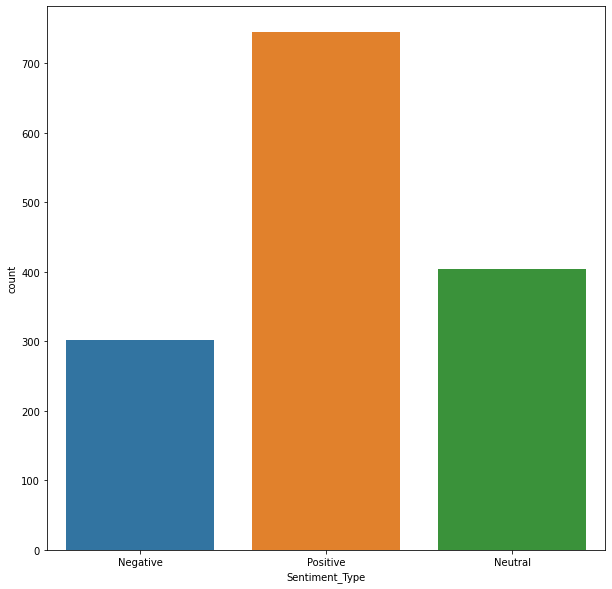

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=df_tweet,)

In [0]:
print("Positive Tweet %:",len(df_tweet[df_tweet['Sentiment_Type']=='Positive'])/len(df_tweet) *100)
print("Neutral Tweet %:",len(df_tweet[df_tweet['Sentiment_Type']=='Neutral'])/len(df_tweet) * 100)
print("Negative Tweet %:",len(df_tweet[df_tweet['Sentiment_Type']=='Negative'])/len(df_tweet) * 100)

Positive Tweet %: 51.34390075809786
Neutral Tweet %: 27.842866988283944
Negative Tweet %: 20.813232253618192


In [0]:
df_tweet[df_tweet['Sentiment_Type']=='Negative']['sentence'][8]

'“This is a flat out lie. They (the media) are making things up” @CharlesHurt  @IngrahamAngle The Lamestream Media is out of control. It would be impossible to fully explain how dishonest they are!'